#Case Study - (Bella Beat) How Can a Wellness Technology Company Play It Smart?

This is a capstone project for Google Data Analytics Professional Certificate Course

Bellabeat is a high-tech manufacturer of beautifully-designed health-focused smart products for women since 2013. Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.





I will be using 6 phases for the analysis such as Ask, Prepare, Process, Analyse, Share and Act.

***#Phase 1: Ask***

**Business Task**

Analyze FitBit fitness tracker data to gain insights into **how consumers are using the FitBit app and discover trends for Bellabeat marketing strategy**.

**Business Objective**

1. What are some trends identified?
2. How can these trends be applied to BellaBeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Deliverables**

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

**Stakeholders**

1. **Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer

2. **Sando Mur:** Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team

3. **Bellabeat marketing analytics team:** A team of data analysts guiding Bellabeat’s marketing strategy.

***#Phase 2: Prepare***

**Information on Data set**


*   Publicly available FitBit Fitness Tracker Data from Kaggle.

*   30 Fitbit users personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 

* The Dataset includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.


**Credibility of the Dataset- Based on ROCCC**

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

**Reliable**— LOW — Not reliable as it only has 30 respondents

**Original** — LOW — Third party provider (Amazon Mechanical Turk)

**Comprehensive** — MED — Parameters match most of Bellabeat products’ parameters

**Current** — LOW — Data is 5 years old and may not be relevant

**Cited** — LOW — Data collected from third party, hence unknown

Overall, the dataset is considered **bad quality data** and the recommendations should only be considered as first hint or direction for the company to take strategical decisions.

**Limitations of the Dataset**

* Data was collected 5 years back in 2016 (may not be relavent for todays trend)

* Data was collected based on paid survey on Amazon Mechanical Turk.

* This Dataset is Biased. (sample collected is not a representation of all fit-bit users)



**Data**

The following files are selected for analysis using Python as downloaded from kaggle.

2 csv files

dailyActivity_merged.csv

sleepDay_merged.csv



***#Phase 3: Process***

Here, we will process the data by cleaning and ensuring that it is correct, relevant, complete and free of error and outlier by performing:

* Explore and observe data
* Check for and treat missing or null values
* Transform data — format data type
* Perform preliminary statistical analysis

**Installing the required python libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

**Importing dataset**

In [ ]:
daily_activity = pd.read_csv("/content/dailyActivity_merged.csv")
daily_sleep = pd.read_csv("/content/sleepDay_merged.csv")


**Data wrangling**

In [ ]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


content of this dataset: 
Id, Date, Steps Taken, Distance Travelled, Active Distance, Active Minutes, Calories Burnt

Checking the Data types, total count of non-null, Column names 

In [ ]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Nummber of null-values in the dataset

In [ ]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

verifying the number of unique users in the dataset

In [ ]:
unique_ids=set(daily_activity['Id'].unique())

In [ ]:
len(unique_ids)

33

In [ ]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [ ]:
daily_sleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [ ]:
daily_sleep.duplicated().value_counts()

False    410
True       3
dtype: int64

**Obervations**

From daily_activity Dataset:
1. There are 33 unique users in the dataset 

2. There are no null values 

3. There are 940 rows and 10 columns

4. ActivityDate is wrongly classified as object instead of Date

From daily_sleep Dataset:

1. SleepDay is wrongly classified as object instead of DateTime

2. There are 410 rows and 5 columns  

3. The dataset has 3 duplicate rows

4. There are no null values 



In [ ]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

In [ ]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [ ]:
daily_activity['ActivityDate']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]

Creating a new column 'date_week' for days of the week

In [ ]:
daily_activity['date_week'] = daily_activity['ActivityDate'].dt.day_name()

In [ ]:
daily_activity['date_week']

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: date_week, Length: 940, dtype: object

In [ ]:
daily_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "date_week":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

In [ ]:
daily_activity.head()

,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


Creating a new column 'total_mins' by adding all the minutes columns

In [ ]:
daily_activity['total_mins'] = daily_activity['very_active_mins'] +daily_activity['fairly_active_mins'] +daily_activity['lightly_active_mins']+daily_activity['sedentary_mins']

In [ ]:
daily_activity['total_mins'].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

Converting total minutes to total hours 

In [ ]:
daily_activity['total_mins'] = daily_activity['total_mins']/60

In [ ]:
round(daily_activity['total_mins'])

0      18.0
1      17.0
2      24.0
3      17.0
4      17.0
       ... 
935    24.0
936    24.0
937    24.0
938    24.0
939    16.0
Name: total_mins, Length: 940, dtype: float64

In [ ]:
daily_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [ ]:
daily_sleep["SleepDay"] = pd.to_datetime(daily_sleep["SleepDay"])

In [ ]:
daily_sleep["SleepDay"]

0     2016-04-12
1     2016-04-13
2     2016-04-15
3     2016-04-16
4     2016-04-17
         ...    
408   2016-04-30
409   2016-05-01
410   2016-05-02
411   2016-05-03
412   2016-05-04
Name: SleepDay, Length: 410, dtype: datetime64[ns]

In [ ]:
daily_sleep= daily_sleep.drop_duplicates()

***Phase 4: Analyze***

Analyzing the statistics of the dataset

In [ ]:
daily_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,total_mins
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,20.312553
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,4.432196
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,16.495833
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,24.000000


In [ ]:
daily_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


Statistical Findings:

* On an average, users recorded 7638 steps or 5.4 kms 
* The users have logged average of 16 hrs or 991 inactive (Sedantary) Minutes
* Calories burnt is 2303, but cannot ascertain as it depends on the users age, weight and other factors.

* Users have 7.1 hours of sleep in a day

In [ ]:
daily_corr = daily_activity.copy()

In [ ]:
daily_corr=daily_corr.reindex(columns=['id','date','day_of_the_week','track_dist','logged_dist','very_active_dist','moderate_active_dist','light_active_dist','sedentary_active_dist','very_active_mins','fairly_active_mins','lightly_active_mins','sedentary_mins','total_steps','total_dist','total_mins','calories'])

In [ ]:
daily_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     940 non-null    int64         
 1   date                   940 non-null    datetime64[ns]
 2   day_of_the_week        940 non-null    object        
 3   track_dist             940 non-null    float64       
 4   logged_dist            940 non-null    float64       
 5   very_active_dist       940 non-null    float64       
 6   moderate_active_dist   940 non-null    float64       
 7   light_active_dist      940 non-null    float64       
 8   sedentary_active_dist  940 non-null    float64       
 9   very_active_mins       940 non-null    int64         
 10  fairly_active_mins     940 non-null    int64         
 11  lightly_active_mins    940 non-null    int64         
 12  sedentary_mins         940 non-null    int64         
 13  total

In [ ]:
daily_corr =daily_activity.corr()

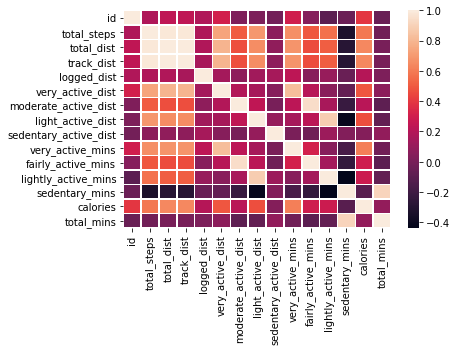

In [ ]:
sns.heatmap(daily_corr, linecolor='white', linewidths=0.6)

**Identifying the Correlation** 

Every step taken, distance travelled and active minutes have positive correlation.

***Phase 5: Share***

Text(0.5, 1.0, 'No. of times users logged in app')

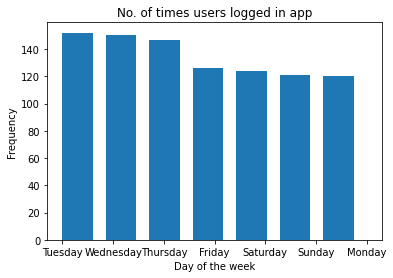

In [ ]:
plt.hist(daily_activity.day_of_the_week, bins=7, width=0.6)
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app")

**Observation**

* Users are more active on mid-week from tuesday to thursday.

* Other days users forget to track.

Text(0.5, 1.0, 'Calories burned for every step taken')

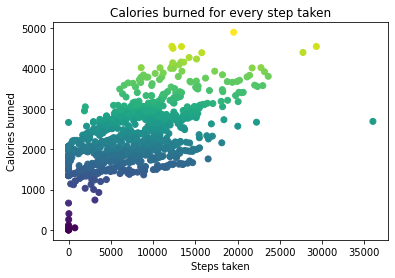

In [ ]:
plt.scatter(daily_activity.total_steps,daily_activity.calories, c=daily_activity.calories)
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")

**Observation**

* Users burn more calories when they take more steps. It has a positive correlation.

* Data has few outliers.

* Outliers could be because of human error or variation in data.

Text(0.5, 1.0, 'Calories burned every hour')

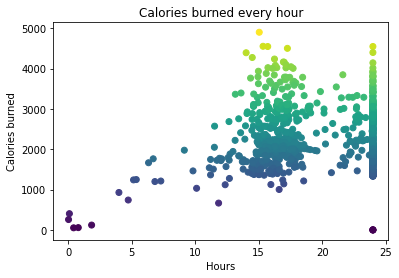

In [ ]:
plt.scatter(daily_activity.total_mins,daily_activity.calories, c=daily_activity.calories)
plt.xlabel("Hours")
plt.ylabel("Calories burned")
plt.title("Calories burned every hour")

**Observations**

* More calories are burnt in the range of 15-20 hours, but doesnot translate to positive correlation.

* Few outliers in the data

([<matplotlib.patches.Wedge at 0x7f1fe3b47150>,
 [Text(1.198214565351024, 0.06543588755917173, 'very_active_mins'),
  Text(1.0886022147551395, 0.1579405522030527, 'fairly_active_mins'),
  Text(0.936051364240948, 0.7508713894553849, 'lightly_active_mins'),
  Text(-0.9994337278611289, -0.6641778554074256, 'sedentary_mins')],
 [Text(0.7988097102340159, 0.04362392503944782, '1.7%'),
  Text(0.6927468639350888, 0.10050762412921534, '1.1%'),
  Text(0.6240342428272986, 0.5005809263035899, '15.8%'),
  Text(-0.6662891519074192, -0.4427852369382837, '81.3%')])

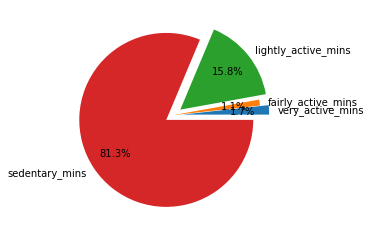

In [ ]:
very_active_mins = daily_activity['very_active_mins'].sum()
fairly_active_mins = daily_activity['fairly_active_mins'].sum()
lightly_active_mins = daily_activity['lightly_active_mins'].sum()
sedentary_mins = daily_activity['sedentary_mins'].sum()

lab=['very_active_mins','fairly_active_mins','lightly_active_mins','sedentary_mins']
plt.pie([very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins], labels=lab, autopct="%1.1f%%", pctdistance=0.7,explode=[0.1,0,0.1,0.1] )

**Observations**

* Sedentary minutes takes the bigger cut at 81.3%

* Where very active minutes is at 1.7%, the data have captured the users daily commute and regular errands, users are not much active on fitness.

In [ ]:
daily_sleep['sleep_hrs'] = daily_sleep['TotalMinutesAsleep'] /60
daily_sleep['in_bed_hrs'] =daily_sleep['TotalTimeInBed']/60

Text(0.5, 1.0, 'Total Sleep Time')

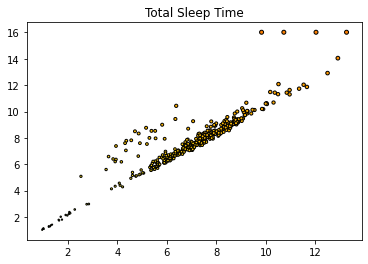

In [ ]:
plt.scatter(x=daily_sleep['sleep_hrs'],y=daily_sleep['in_bed_hrs'], c=daily_sleep['in_bed_hrs'],s=daily_sleep['in_bed_hrs'] , cmap='Wistia', edgecolors='black')
plt.title("Total Sleep Time")


**Observations**

* Average sleep time for the logged in users is in the range of 6 to 9 hrs per day.

* There are few outliers in the dataset.


***Phase 6: Act***



**Recommendation**

1. What are the trends identified?
  * 81.3% of the time users are inactive (sedentary).

  * Users are active on weekdays and inactive on weekends.

  * Users sleep between 6-9 hours per day.


2. How could these trends apply to Bellabeat customers?

  * Based on the activity levels and amount of calories burned, users appear to burn more calories with more exercise. Therefore, Bellabeat should encourage users to exercise more through reminders. Bellabeat could also create daily learder board based on steps taken and calories burnt.

  * Inducing an habbit of doing excercise for 5 mins every hour of the active day by sending some reminders and notifications through the app. 

3. How could these trends help influence Bellabeat marketing strategy?

  * The data shows that the sedentary minutes are more in the users daily routine. could be because of their work nature or used with their lazy routine. Bellabeat could create some short exercise videos for 5 mins which they can do even at their work place.

  * To encourage better sleeping habits, Bellabeat could incorporate reminders through an app that notifies users of the best time to go to sleep and wake up in order to feel refreshed in the morning and get adequate amount of sleep. The app could also automatically turn on ‘do not disturb’ mode and turn on ‘night mode’ on the customers’ phones to signal the user that they are not disturbed by messages or phone calls from family and friends.